# NDANG RAMPUNG YOK


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('water_potability.csv')

print(df.dtypes)
df.head

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

In [2]:

# Arithmetic mean
print("Arithmetic mean")
print(df.mean(numeric_only=True))
print("")

# Geometric mean
print("Geometric mean")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(np.exp(np.mean(np.log(numeric_df[numeric_df > 0]))))

# Standard deviation
print("Standard deviation")
print(df.std(numeric_only=True))
print("")

# Quartiles
print("Quartiles")
print(numeric_df.quantile([0.25, 0.5, 0.75]))
print("")

# Median
print("Median")
print(df.median(numeric_only=True))
print("")

# Mean absolute deviation #menggambarkan variabilitas data
print("Mean absolute deviation")
print(numeric_df.apply(lambda x: (x - x.mean()).abs().mean()))
print("")

# Variance #menggambarkan variasi data #kuadrat dari standar deviasi
print("Variance")
print(df.var(numeric_only=True))
print("")

# Standard error of the mean (SEM)
print("Standard error of the mean")
print(df.sem(numeric_only=True))
print("")

#menunjukkan seberapa sempit atau lebar datanya(skewness & kurtosis)

# Skewness
print("Skewness")
print(df.skew(numeric_only=True))
print("")

# Kurtosis 
print("kurtosis")
print(df.kurtosis(numeric_only=True))
print("")

Arithmetic mean
ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

Geometric mean
63.425364515605345
Standard deviation
ph                    1.594320
Hardness             32.879761
Solids             8768.570828
Chloramines           1.583085
Sulfate              41.416840
Conductivity         80.824064
Organic_carbon        3.308162
Trihalomethanes      16.175008
Turbidity             0.780382
Potability            0.487849
dtype: float64

Quartiles
            ph    Hardness        Solids  Chloramines     Sulfate  \
0.25  6.093092  176.850538  15666.690297     6.127421  307.699498   
0.50  7.036752  196.967627  20927.833607     7.130299  333.073546   
0.75  8.062066  216.667456  27332.762127     8.11488

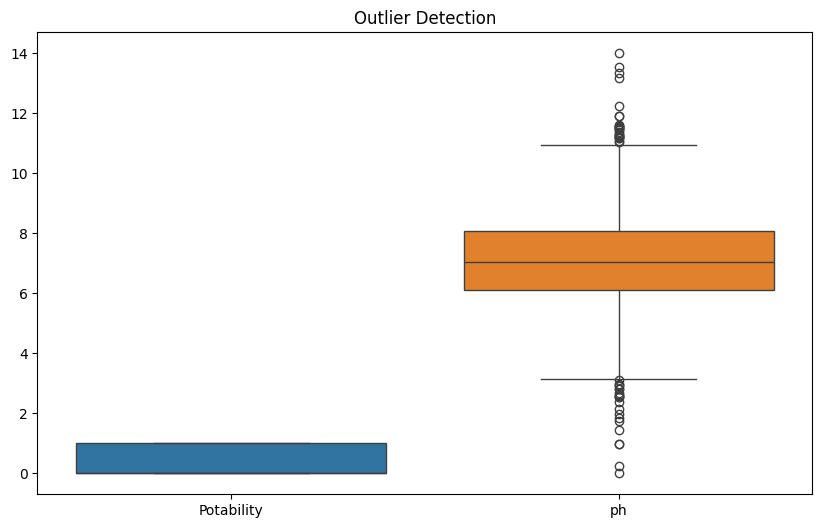

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Potability', 'ph']])
plt.title('Outlier Detection')
plt.show()

In [4]:
# 3-Sigma Rule
def detect_outliers_3sigma(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return data[(data < mean - 3 * std_dev) | (data > mean + 3 * std_dev)]

outliers_3sigma = numeric_df.apply(detect_outliers_3sigma)
print("3-Sigma Outliers:\n", outliers_3sigma)

3-Sigma Outliers:
             ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
37         NaN  304.235912           NaN          NaN      NaN           NaN   
66         NaN         NaN           NaN          NaN      NaN    669.725086   
80    1.844538         NaN           NaN          NaN      NaN           NaN   
88         NaN  300.292476           NaN          NaN      NaN           NaN   
140        NaN         NaN           NaN          NaN      NaN    672.556999   
...        ...         ...           ...          ...      ...           ...   
3179       NaN   94.908977           NaN          NaN      NaN           NaN   
3190       NaN         NaN  50166.533323          NaN      NaN           NaN   
3221       NaN  303.702627           NaN          NaN      NaN           NaN   
3226       NaN         NaN  51731.820553          NaN      NaN           NaN   
3269       NaN   94.812545           NaN          NaN      NaN           NaN   

      Organic_carbon

In [5]:
# Tukey's Fences #berdasarkan sudut pandang
def detect_outliers_tukey(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data < lower_bound) | (data > upper_bound)]

outliers_tukey = numeric_df.apply(detect_outliers_tukey)
print("Tukey's Fences Outliers:\n", outliers_tukey)

Tukey's Fences Outliers:
       ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
18   NaN  279.357167           NaN          NaN      NaN           NaN   
37   NaN  304.235912           NaN          NaN      NaN           NaN   
43   NaN         NaN           NaN          NaN      NaN           NaN   
51   NaN  100.457615           NaN          NaN      NaN           NaN   
66   NaN         NaN           NaN          NaN      NaN    669.725086   
...   ..         ...           ...          ...      ...           ...   
3230 NaN  114.807578           NaN          NaN      NaN           NaN   
3236 NaN         NaN  48007.868134          NaN      NaN           NaN   
3244 NaN  277.065713           NaN          NaN      NaN           NaN   
3269 NaN   94.812545           NaN          NaN      NaN           NaN   
3271 NaN         NaN  47580.991603          NaN      NaN           NaN   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
18               NaN  

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        

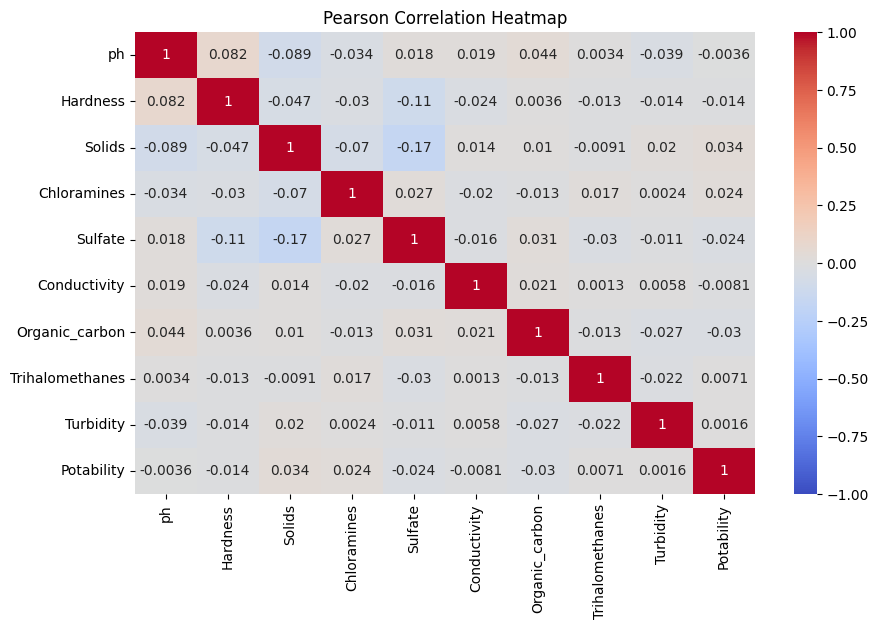

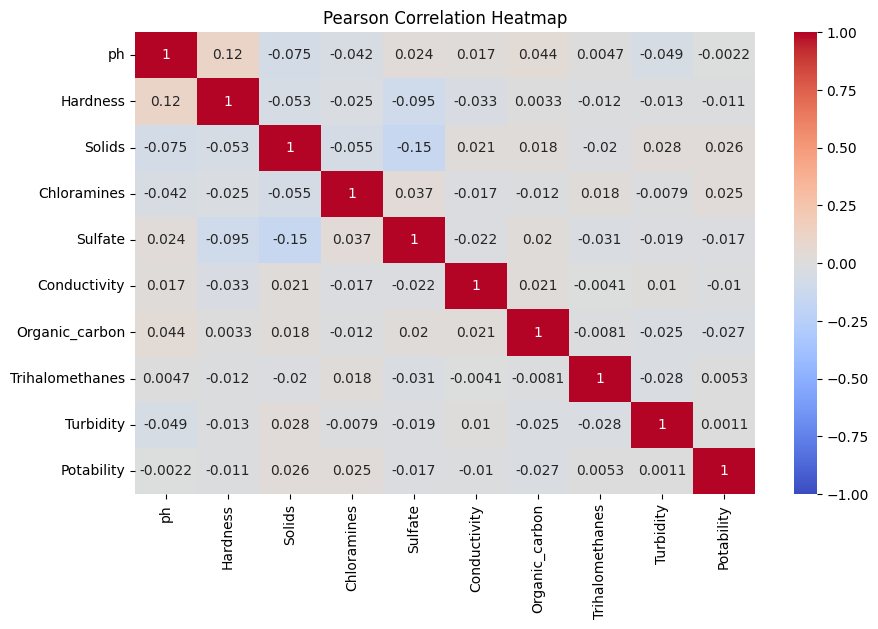

In [6]:
# Pearson correlation
pearson_corr = df.corr(method='pearson', numeric_only=True)
print(pearson_corr)

# Spearman correlation
spearman_corr = df.corr(method='spearman', numeric_only=True)
print(spearman_corr)

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm',vmin=-1.0,vmax=1.0)
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm',vmin=-1.0,vmax=1.0)
plt.title('Pearson Correlation Heatmap')
plt.show()

### ANOVA

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for magnitude by alert level
model = ols('Potability ~ Turbidity', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq      df        F    PR(>F)
Turbidity    0.001947     1.0  0.00818  0.927939
Residual   779.437613  3274.0      NaN       NaN


### Data visualization

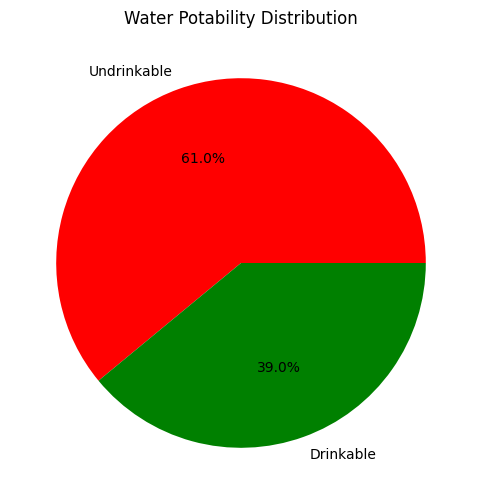

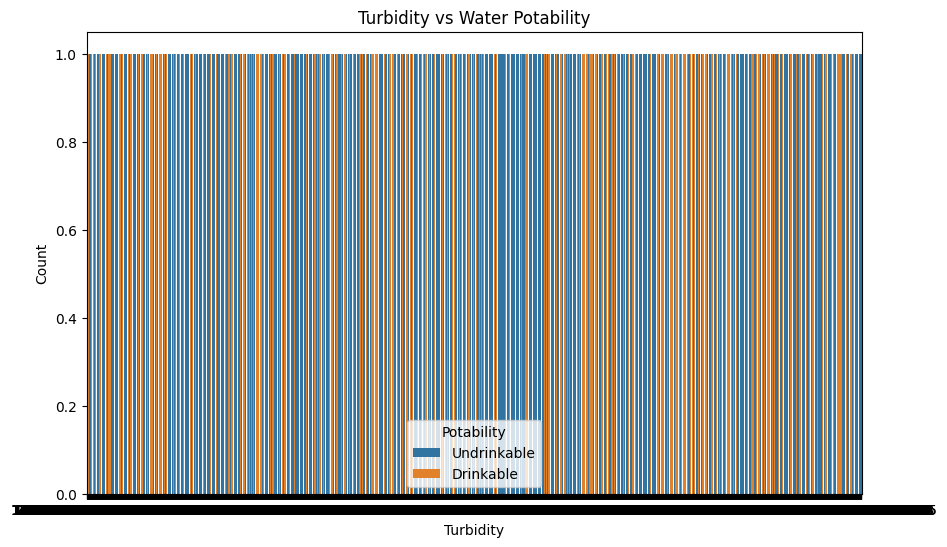

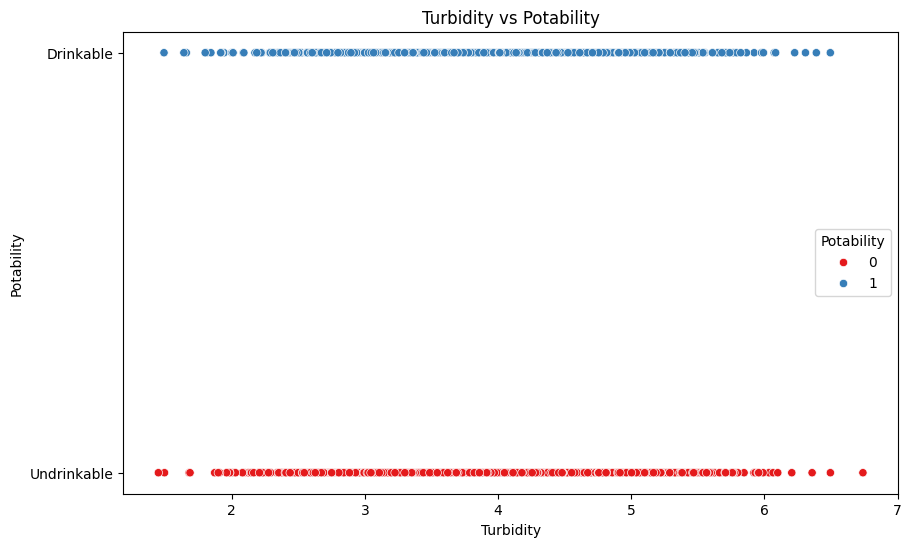

In [9]:
import seaborn as sns
# Pie chart untuk potabilitas air
Turbidity_counts = df['Potability'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Turbidity_counts, labels=['Undrinkable', 'Drinkable'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Water Potability Distribution')
plt.show()

# Bar chart untuk menunjukkan tingkat kewaspadaan 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Turbidity', hue='Potability')
plt.title('Turbidity vs Water Potability')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.legend(title='Potability', labels=['Undrinkable', 'Drinkable'])
plt.show()


# Scatter plot untuk menunjukkan hubungan antara Turbidity dan Potability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Turbidity', y='Potability', hue='Potability', palette='Set1')
plt.title('Turbidity vs Potability')
plt.xlabel('Turbidity')
plt.ylabel('Potability')
plt.yticks([0, 1], ['Undrinkable', 'Drinkable'])
plt.show()